Q1

1. 
In simple linear regression, one dependent variable is predicted using a single independent variable. In multiple linear regression, one dependent variable is predicted using two or more independent variable. The latter is better because it increased predictive power, improved model fit and helped researchers to understand interactions between variables.

2. 
A continuous variable is a numeric value that can take any number within a given range, while an indicator variable can only take two values, in order to indicate the absence or presence of a characteristic. 
Continuous variable X: Y=β+β1\*X+ϵ (effect of X on Y is measured in slope)
Indicator variable D: Y=β+β1\*D+ϵ (model compares two groups, with β1 indicating the average difference between the two groups)

3. 
When a simple linear regression is shifted to multiple linear regression, the changes are:
a. The outcome variable is now predicted by more than one factor. This adds additional complexity to the model.
b. Interpretation of coefficients is modified: In simple linear regression, coefficients represented the average change in the outcome variable for a one-unit increase in the predictor variable. However, in multiple linear regression, each coefficient now represents the average change in the outcome variable associated with a one-unit increase in the corresponding outcome variable, assume all other predictor variable are held constant.
Common form of a multiple linear regression:
Yi = β0 + β1\*x1 + β2\*x2 + β3\*x3 + ... + βk\*xk + ϵ
Yi: The dependent variable
β0: The intercept term
β1, β2, β3, ..., βk: The coefficients of the independent variables x1, x2, x3, ..., xk, with each coefficient measuring the change in Yi associated with a one-unit change in the corresponding xi, holding all other variables constant
x1, x2, x3, ..., xk: The independent predictor variables
ϵ: The error term

4. 
Adding an interaction between a continuous and an indicator variable allows for the analysis of how the relationship between the outcome variable and the continuous predictor variable changes across different groups defined by the indicator variable. This is not possible in a multiple linear regression model without interaction.
Form of a multiple linear regression with interaction:
Yi = β0 + β1\*xi + β2\*ki + β3\*xi\*ki + ϵ
β1xi: effect of the continuous variable xi on Yi when ki=0
β2ki: effect of the indicator variable ki on Yi
β3(xi\*ki): Interaction term that captures how the effect of x on y changes when z=1
ϵ: error term
By including an interaction term, the model can capture more complex relationships between variables and better model scenarios when the impact of one predictor depends on another predictor. 

5.
Instead of fitting a continuous slope to the data, this model assigns distinct mean values to each category relative to the reference category. This will result in the regression to be piecewise flat for each category.
Linear form: Yi = β0 + β1\*x1 + β2\*x2 + β3\*x3 + ... + βk\*xk + ϵ
This approach is suitable when the relationship between the categorical variable and the dependent variable is best captured by treating each category as having a distinct effect rather than a trend or a slope.

Q2

Outcome variable: Sales. The outcome that the company is likely to be interested in is the effectiveness of its advertising campaigns, which would be measured in sales.
Predictor variables:
1. TV advertising spend
2. Online advertising spend

Some meaningful interactions:
TV advertising spend \* Online advertising spend
The combined effect of both TV and online advertising on sales. This term captures how the effectiveness of one type of advertising changes depending on the effectiveness of the other type.

Form without interactions: Sales = β0 + β1(TV Advertising Spend) + β2(Online Advertising Spend) + ϵ
Form with interactions: Sales = β0 + β1(TV Advertising Spend) + β2(Online Advertising Spend) + β3(TV * Online) + ϵ

Steps:
1. Collect data
2. Fit regression models
3. Plug in values for TV advertising spend and online advertising spend to predict future values

The effect of interaction:
Without interaction: The model assumes that TV and online advertising have independent effects on sales. This means that the impact of TV advertising on sales doesn't change depending on how much money is spent on online advertising.
With interaction: The model takes into account the possibility that the effectiveness of one type of advertising may depend on the other. The interaction term allows for situations such as: Spends on TV and online advertising together lead to a greater increase in sales, or they lead to a diminishing return when combined.

If we change to binary values:
Without interactions: Sales = β0 + β1(TV High) + β2(Online High) + ϵ
With interactions: Sales = β0 + β1(TV high) + β2(Online high) + β3(TV high * Online high) + ϵ

Steps: 
1. Convert high and low categories to numerical values: high=1, low=0
2. Use historical data with these categorical variables to fit the models and estimate the coefficient
3. Predict the future by plugging in a recent value

Q3

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
data = pd.read_csv('CSCS_data_anon.csv', low_memory=False)

# Check if the necessary columns exist
required_columns = [
    'DEMO_age', 'LONELINESS_UCLA_score', 
    'CONNECTION_close_friends_num_spend_time_with', 
    'CONNECTION_social_network_description', 
    'DEMO_gender', 'DEMO_identity_religious'
]

# Check if all required columns are present
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Extract relevant columns and drop rows with missing values
    subset = data[required_columns].dropna()

    # Convert numeric columns if necessary
    subset['DEMO_age'] = pd.to_numeric(subset['DEMO_age'], errors='coerce')
    subset['LONELINESS_UCLA_score'] = pd.to_numeric(subset['LONELINESS_UCLA_score'], errors='coerce')
    subset['CONNECTION_close_friends_num_spend_time_with'] = pd.to_numeric(
        subset['CONNECTION_close_friends_num_spend_time_with'], errors='coerce')
    subset['CONNECTION_social_network_description'] = pd.to_numeric(
        subset['CONNECTION_social_network_description'], errors='coerce')

    # One-hot encode categorical variables
    subset = pd.get_dummies(subset, columns=['DEMO_gender', 'DEMO_identity_religious'], drop_first=True)

    # Define the independent variables (X) and dependent variable (y)
    X = subset.drop('LONELINESS_UCLA_score', axis=1)
    y = subset['LONELINESS_UCLA_score']

    # Add a constant to the independent variables for the intercept
    X = sm.add_constant(X)

    # Fit a multiple linear regression model
    model = sm.OLS(y, X).fit()

    # Display the summary of the regression model
    print(model.summary())

Q4

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [2]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        15:46:08   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is actually not a contradiction, since r^2 and p-values address different aspects of a model.
r^2 quantifies the proportion of variation in the outcome variable that is explained by the predictor variables in the model. A low r^2 value simply means that the model doesn't explain much variability in the outcome due to several factors, such as:
a. The outcome variable may be inherently noisy.
b. The model may be missing important predictor variables.
c. The relationships between the predictor variables and the outcome variable may be non-linear.
P-values on the other hand, are used for hypothesis testing and measuring the strength of eidence against a null hypothesis. A low p-value indicates strong evidence against the null hypothesis, suggesting that the corresponding coefficient is likely not zero.
Therefore, a model can have large coefficients with low p-values. This means that although the model may not explain a large proportion of variability in the outcome, the predictor variables included in the model still have significant statistical impact on the outcome. 

Q5

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

#Calculate half the number of rows in the pokeaman dataframe
fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

#Randomly split the dataframe into training and testing sets, with each set containing half the data
np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


In [5]:
#Defining an Ordinary Least Squares regression model
#The formula specifies the relationship you want: between dependent variable (HP) and independent variables (Attack and Defense)
#Data specifies the model should use training dataset
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)

#.fit() method fits the OLS model to the training data
model3_fit = model_spec3.fit()

#Generate a detailed statistical summary of the fitted model
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        17:00:15   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
#.predict() is used to generate predictions for the HP values in the test dataset using the fitted model
yhat_model3 = model3_fit.predict(pokeaman_test)

#Defining actual values from the original dataset
y = pokeaman_test.HP

#In sample r^2 value
print("'In sample' R-squared:    ", model3_fit.rsquared)

#Out of sample r^2 value (assesses the model's performance on new data)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


In [9]:
#Building a more complex formula:
#* means that all possible interaction will be included, along with the main effects
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'

#Including interaction terms with special characters in variable names (use Q())
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

#Fitting the model using the training dataset and generate a summary
model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        17:10:47   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

In [10]:
#Generate predictions for HP values based on more complex model
yhat_model4 = model4_fit.predict(pokeaman_test)

#Define actual values and generate r^2
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


The five cells of code illustrate the process of building, evaluating and validating linear regression models using training and testing datasets. 
Training dataset is used to fit the models, while the testing dataset is used to validate the models' performance on new, unseen data. 
After building the linear regression model and fit it using the training dataset, the code evaluated the performance of the model using two metrics:
In-sample r^2: How well the model fits the training data
Out-of-sample r^2: How well the model generalizes to new, unseen data (test set)
We can use these metrics to detect overfitting by comparing in-sample and out-of-sample r^2. If the model performs well on training data but poorly on test data, it may be overfitting. We can see this type of result from model 4, which suggests that model 4, despite being complex, is overfitting to the training dataset and cannot be generalized to all data.

Q6

In [11]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        17:22:55   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [13]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


The design matrix is the underlying matrix of predictor variables used by model 4. Each row represents an observation, and each column represents a predictor variable or interaction term derived from the formula.
The formula includes several predictors that are centered and scaled.
Centering: subtracts the mean of the variable to make its mean zero.
Scaling: divides by the standard deviation to make its standard deviation equal to one

Condition number: A metric that measures the numerical stability of a matrix, especially in the context of regression models. It tells you how sensitive the model is to small changes in the input data. It can help identify issues like multicollinearity and numerical instability.
Even after centering and scaling, the condition number is still very high, there are several reasons:
a. Large number of interaction terms, especially higher-order interactions
b. Multicollinearity between interaction terms and the original variables
c. Sparse data or near-zero variance in some of the interaction terms

Multicollinearity: Multicollinearity occurs when two or more predictor variables in the design matrix are highly correlated to each other. These predictors do not provide unique information to the model, which causes issues during coefficient estimation. 
Multicollinearity in design matrix contributes to poor out of sample generalization because it leads to unstable regression coefficients. Here is the problem explained in detail:
a. When predictors are highly correlated, the model struggles to assign the correct weight to each variable. Small changes in data will lead to large swings in coefficient values.
b. Due to instability, the estimated coefficients have large variances. This will lead to the coefficients looking good on training data, but fail to generalize to new data.
c. Multicollinearity increases the likelyhood of overfitting because the model captures noise in the training data rather than the true underlying patterns. This leads to poor predictive performance on test data. (Noise: any unwanted, random variation in the dataset that obscures the true relationship between predictors and outcome variable)

Q7

In [14]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        17:41:03   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [15]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


Priciple of Parsimony:
The idea behind parsimony is to use the simplest model that adequately explains the data. A simpler model is less likely to overfit, more interpretable and often generalize better to new data. 
Model 5 focuses on the main effects and includes only relevant categorical variables without going \*crazy\* with interactions. This simplification reduces noise and focuses on the most important variables.

In [16]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        17:48:12   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


Feature Selection and Targeted Inclusion
Instead of including all possible categorical levels, model 6 focuses on only those levels that were found to be statistically siginificant in previous analyses. This targeted inclusion reduces noise and focuses on predictors that have been shown to be useful.

In [18]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        18:35:19   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [19]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Model 7 leverages interaction terms where they are most likely to add useful values, instead of including interactions indiscriminately as in model 4. This captures more complex relationships between predictors that may not be adequately modeled using only main effects, while attempting to avoid overfitting. Model 7 is a balanced version of all the previous models. 

In [20]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [21]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


Model 7 CS implemented centering and scaling to the previous version. Centering and scaling help reduce numerical instability by ensuring that all predictors are on a similar scale. This has a siginificant impact when interaction terms are involved: the interaction terms become easier to interpret since they now represent deviations from the mean rather than raw values. 

Q8

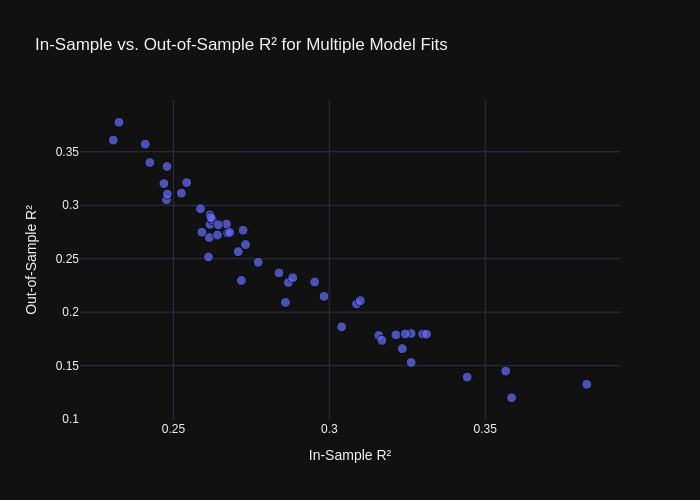

In [23]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import plotly.express as px

# Number of iterations for repeated model evaluations
n_iterations = 50
in_sample_r2 = []
out_sample_r2 = []

# Loop to create models with different train-test splits and collect metrics
for i in range(n_iterations):
    # Split the dataset into training and testing sets (without setting a random seed)
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.7)
    
    # Define and fit the model using a specified formula
    model_spec = smf.ols(formula='HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")', data=pokeaman_train)
    model_fit = model_spec.fit()
    
    # Calculate the "in-sample" R-squared
    in_sample_r2.append(model_fit.rsquared)
    
    # Generate predictions on the test set
    yhat_test = model_fit.predict(pokeaman_test)
    y_test = pokeaman_test['HP']
    
    # Calculate the "out-of-sample" R-squared
    out_sample_r2.append(np.corrcoef(y_test, yhat_test)[0, 1] ** 2)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'In-sample R²': in_sample_r2, 'Out-of-sample R²': out_sample_r2})

# Visualize the results using Plotly Express
fig = px.scatter(
    results_df, 
    x='In-sample R²', 
    y='Out-of-sample R²', 
    title="In-Sample vs. Out-of-Sample R² for Multiple Model Fits",
    labels={'In-sample R²': 'In-Sample R²', 'Out-of-sample R²': 'Out-of-Sample R²'},
    template='plotly_dark'
)
fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='black')))
fig.update_layout(
    xaxis=dict(showgrid=True, zeroline=True, zerolinecolor='gray'),
    yaxis=dict(showgrid=True, zeroline=True, zerolinecolor='gray')
)
fig.show(renderer="png")

This model explores how different train-test split affects out of sample r^2 and in-sample r^2. The idea is to run a for loop to repeatedly train and test a model on randomly split data, then collect the results of both in-sample and out-of-sample performance metrics for each iteration. We are not using np.random.seed(), because we want each iteration to generate a different random split of the data, otherwise it will result in the same model performance metrics each time. 
Through this demonstration:
a. One get to see the variabiliy in model performance due to different train-test splits. 
b. Easy identification of whether the model tends to overfit. 
c. It helps in assessing the stability of the model: if the model's out-of-sample performance fluctuates a lot, it may not be stable. 

Q9 

Snippet 1: 
This code is comparing the performance of model 7 in two scenarios:
1. Evaluate the model's performance on the original dataset using a standard train-test split
2. Train this model only on Pokemon from Generation 1, and evaluates its ability to generalize to pokemon from other generations.
This approach helps to evaluate how well the model trained on older data (Gen 1) generalizes to newer data (>=Gen 2)
The results and analysis:
1. If the out-of-sample r^2 for gen1_predict_future is significantly lower than the original model's out-of-sample r^2, this suggests that the model trained on older generations does not generalize well to newer generations. This may be caused by different variations in older and newer data, while this may also suggest that the model is not robust enough.
2. If the out-of-sample r^2 is relatively high, then it indicates that the relationships captured by model on gen 1 are still applicable to later generations. This result shows that the model is robust and stable. 

Snippet 2: 
This code trains model 7 using Pokemon data from Gen 1 to Gen 5, and then test how well the model generalizes to Gen 6. 

Snippet 3: 
In order to compare how complexity affects model performance, model 6 is set up as a control group. 
This code snippet compares between the performance of model 6 trained on regular train-test-split and model 6 trained on only gen 1 data, as it is previously done on model 7.

Snippet 4: 
This code snippet evaluates the performance of model 6 trained on gen 1 to gen 5 data and generalizes to gen 6 data.

Why are we evaluating models by how they predict the future?
We are assessing the generalization ability of the models. This evaluation helps determine whether a model which is trained on older or limited data can still make accurate predictions on new unseen data. 

Why are we comparing model 6 and model 7?
We are setting up model 6 and model 7 against each other, in order to understand which model has better predictive power and generalization ability. Model 6 is a simpler model with a focus on main effects, while model 7 includes interactions between multiple predictors. 
Model 6 is designed to be robust and interpretable, since it omitted any interactions in order to avoid unnecessary complexity. Model 7's added complexity might help in capturing potential non-linear relationships, but also risks overfitting and might not generalize well.

However, this type of analysis has its limitations:
There is potential data shifts in the pokemon dataset, since the latest generation might have different characteristics or design trends compared to older generations. This will cause the model to fit poorly to newer data regardless of its design.

Chatlogs:
1. https://chatgpt.com/share/6737c4e0-10bc-8001-9f58-6133341baa16
2. https://chatgpt.com/share/6737c4ed-7b78-8001-9334-a1fb30560174
3. https://chatgpt.com/share/6737c502-1bd8-8001-9735-2387148da46f